# 1. Importing library

In [1]:
import networkx as nx  # The nx is a very standard way of using networkx

In [2]:
%matplotlib inline
# Do this to avoid each time calling matplotlib to show the image plotted.

# 2. Manipulating a Graph

### 2.1 Create an empty Graph

In [3]:
G = nx.Graph()  # An Undirected graph

By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc. (Note: Python's None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.)

### 2.1 Adding nodes

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we'll look at simple manipulations. You can add one node at a time.

In [4]:
G.add_node(0)

Nodes can also be added from a list, set, tuple, dictionary or any iterable sequence.

In [5]:
G.add_nodes_from([1, 2, 3, 4])

In [6]:
H = nx.path_graph(10)

In [7]:
G.add_nodes_from(H)  # It does what it literally reads, adds nodes from H to G.

In [8]:
G.add_node(H)  # Nodes can be anything (hashable object) !

The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in G and have a separate dictionary keyed by identifier to the node information if you prefer. (Note: You should not change the node object if the hash depends on its contents.)

### 2.2 Adding edges

In [9]:
G.add_edge(1, 2)

In [10]:
e = (2, 3)

In [11]:
G.add_edge(e)  ## !! Error !!

TypeError: add_edge() takes at least 3 arguments (2 given)

In [12]:
# Unpack the tuple into two numbers !
G.add_edge(*e)

Add from a list of edges

In [13]:
G.add_edges_from([(1, 2),(1, 3)])

Or from any `ebunch` of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g. (2, 3, {'weight' : 3.1415}). Edge attributes are discussed further below

One can demolish the graph in a similar fashion; using 
* `Graph.remove_node`
* `Graph.remove_nodes_from`
* `Graph.remove_edge`
* `Graph.remove_edges_from`

In [14]:
G.remove_node(H)

**Note:** Adding an edge creates new nodes, if they are not already present.

In [15]:
G.clear()  # Removes all the edges and nodes.

### 2.3 Analyzing Graph

In [16]:
# Let's add something !
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)

In [17]:
G.nodes()  # Returns a list with the nodes

[1, 2, 3]

In [18]:
G.edges()  # Returns a list of tuples of pair of nodes

[(1, 2), (1, 3)]

In [19]:
len(G.nodes()) == G.number_of_nodes() == 3

True

In [20]:
len(G.edges()) == G.number_of_edges() == 2

True

#### Question !

In [21]:
G.add_node("networkx")
G.add_nodes_from("networkx")
# What do we expect?

In [ ]:
G.nodes()  # See yourself

In [23]:
G.remove_nodes_from("networkx")

In [ ]:
G.nodes()

In [25]:
G.remove_edge(1, 3)

In [26]:
G.edges()

[(1, 2)]

### 3. Attributes, names and weights.

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.node and G.edge for a graph G.


### 3.1 Node attributes

In [27]:
G.clear()

In [28]:
G.name = "Cities"

In [29]:
G.add_node("Delhi", country="India")
G.add_node("Mumbai", country="India")
G.add_node("Austin", county="USA")
G.add_node("NYC", country="USA")

In [30]:
G.nodes()

['NYC', 'Delhi', 'Austin', 'Mumbai']

In [31]:
G.nodes(data=True)

[('NYC', {'country': 'USA'}),
 ('Delhi', {'country': 'India'}),
 ('Austin', {'county': 'USA'}),
 ('Mumbai', {'country': 'India'})]

**`G.nodes`** function vs **`G.node`** property

In [33]:
G.node  # A dictionary of nodes as key and dictionary of attributes as value

{'Austin': {'county': 'USA'},
 'Delhi': {'country': 'India'},
 'Mumbai': {'country': 'India'},
 'NYC': {'country': 'USA'}}

In [34]:
G.node['Delhi']  # Returns attribute dictionary of the node

{'country': 'India'}

**Note:** Attributes can also be added after adding a node.

In [35]:
G.add_node("Madrid")

In [36]:
G.node["Madrid"]["country"] = "Spain"

**Note:** Adding a node to `G.node` dictionary does not add it to the Graph. Always use traditional methods.

In [37]:
G.edges()

[]

In [39]:
# Let's add one more attribute to the cities, time zone
G.node["NYC"]["tz"] = -5
G.node["Delhi"]["tz"] = 5.5
G.node["Mumbai"]["tz"] = 5.5
G.node["Austin"]["tz"] = -6
G.node["Madrid"]["tz"] = 1

### 3.2 Edge Attributes

Add edge attributes using `add_edge()`, `add_edges_from()`, subscript notation, or `G.edge`.

In [40]:
G.add_edge("Delhi", "NYC", tz_diff=10.5)  # Adding time zone difference as a weight

In [41]:
# Completing the graph
G.add_edge("Delhi", "Mumbai", tz_diff=0)
G.add_edge("Delhi", "Austin", tz_diff=11.5)
G.add_edge("Delhi", "Madrid", tz_diff=4.5)

In [42]:
G["Delhi"]

{'Austin': {'tz_diff': 11.5},
 'Madrid': {'tz_diff': 4.5},
 'Mumbai': {'tz_diff': 0},
 'NYC': {'tz_diff': 10.5}}

In [43]:
G["NYC"]["Madrid"] # You cannot add a new edge like this. You need to use G.add_edge

KeyError: 'Madrid'

*__Assignment:__ Write code to add all the edges with the `tz_diff` attribute using for/while loops.*

### 3.3 Graph as Python dictionary

In [45]:
# ...where nodes are the primary keys
G["Delhi"]

{'Austin': {'tz_diff': 11.5},
 'Madrid': {'tz_diff': 4.5},
 'Mumbai': {'tz_diff': 0},
 'NYC': {'tz_diff': 10.5}}

In [46]:
G["Delhi"]["Mumbai"]

{'tz_diff': 0}

In [47]:
G["Delhi"]["Mumbai"]["tz_diff"]

0

### 3.4 Directed Graphs
The edges are directed, i.e `DG.add_edge(1, 2)` will add an edge from node 1 to 2 but not from 2 to 1, unlike `G.add_node(1, 2)`

In [48]:
DG = nx.DiGraph()
G = nx.Graph()

In [49]:
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
G.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [50]:
print(DG[1])
print(G[1])

{2: {'weight': 0.5}}
{2: {'weight': 0.5}, 3: {'weight': 0.75}}


### 3.5 Connectedness

In [56]:
G = nx.path_graph(4)

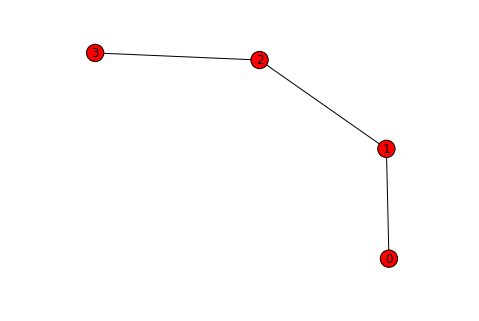

In [58]:
nx.draw(G, with_labels=True)

**Drawing Paradigm:** Fundamentally, `nx.draw` plots a matplotlib figure but does not display it. For displaying the plot, import `pyplot` from `matplotlib` module and use the `show` function. After executing the `show` function once, it won't work one more time. You need to `draw` again for it.

Here we have used the ipython's feature of inline plotting (refer to 2nd cell of the notebook) and hence the plot is displayed right after drawing.

In [60]:
nx.is_connected(G)

True

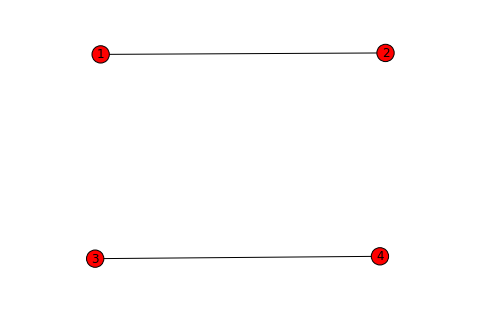

In [63]:
G = nx.Graph()  # New Graph
G.add_edges_from([(1, 2), (3, 4)])
nx.draw(G, with_labels=True)

In [64]:
nx.is_connected(G)

False

### 3.6 Shortcuts

In [65]:
1 in G  ## Check if a node is present in the Graph

True

In [66]:
len(G)  ## Number of nodes

4